In [2]:
cams = ["webcam0"]

In [3]:
import time

start_time = 1514219470.8327603#time.time() - 24*3600
end_time = 1514305870.832823#time.time()
username = "sean"
print(start_time, end_time)

1514219470.8327603 1514305870.832823


In [1]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

In [6]:
%load_ext autoreload
%autoreload 2
from controllers.dbreader.imagereader import ImageReader

imreader = ImageReader()
imdata, times = imreader.read_db(username, start_time, end_time, cams)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
print(len(imdata), len(times))

11143 11143


In [8]:
from controllers.dbreader.utils import get_db
db = get_db()

In [26]:
text = list(db.speech.find({"user_name": username, "time": {"$gte": start_time, "$lt": end_time}, "type": "speech"}))

In [27]:
len(text)

53

記録 ベッドで寝る


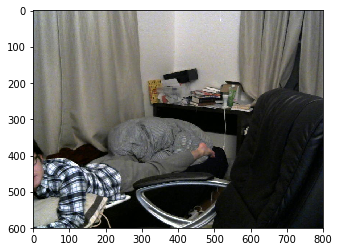

記録 ベッドで寝る


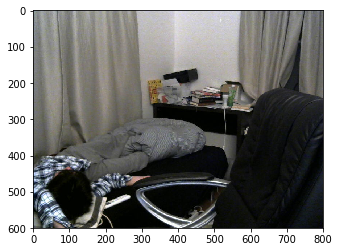

記録 本を読む


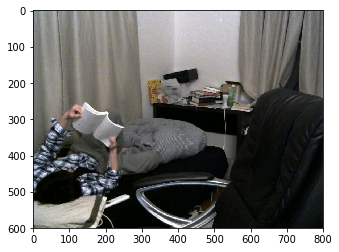

記録 ベッドで寝る


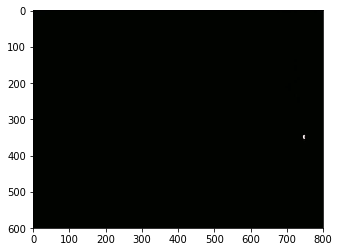

記録 本


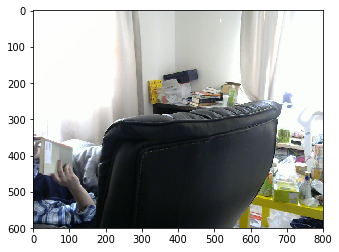

記録 本を読む


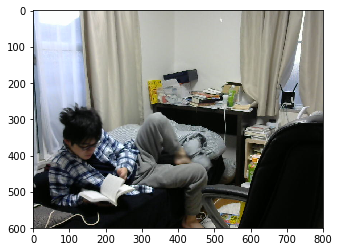

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for t in text:
    if "記録" in t["text"] and ("本" in t["text"] or "ベッド" in t["text"]):
        i = np.searchsorted(times, t["time"])
        path = "images/raw_images/" + imdata[i][0]["filename"]
        print(t["text"])
        img = plt.imread(path)
        plt.imshow(img)
        plt.show()

In [45]:
labels

['記録テスト',
 '記録',
 '記録テスト',
 '記録 パソコン',
 '記録 パソコン',
 '記録テスト',
 '記録 パソコン',
 '快記録テスト',
 '記録テスト',
 '記録 ベッドで寝る',
 '記録 ベッドで寝る',
 '記録 本を読む',
 '記録 スマートフォン',
 '記録 パソコン',
 '記録 ベッドで寝る',
 '記録 スマートフォン',
 '記録',
 '記録 本',
 '記録 スマートフォン',
 '記録 勉強',
 '記録 本を読む',
 '記録 スマホ',
 '記録 スマートフォン',
 '記録 ゲーム']